In [1]:
# to import .ipynb files
import import_ipynb
import os # for interacting with the operating system
import numpy as np # for linear algebra operations
import pandas as pd # for data processing and reading/writing CSV files
import matplotlib.pyplot as plt # for plotting data
import seaborn as sns # for creating beautiful plots
import librosa # a library for analyzing audio and music
import librosa.display # for displaying audio data
from IPython.display import Audio # for playing audio files

# Importing necessary modules from scikit-learn library
# StandardScaler is used for feature scaling
# OneHotEncoder is used for one-hot encoding categorical variables
# confusion_matrix and classification_report are used for evaluating the performance of a classifier
# train_test_split is used for splitting the data into training and testing sets

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import roc_curve, auc

D:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# DAtaset integration
import dataset_integration
Males, Females = dataset_integration.integrate_datasets()

importing Jupyter notebook from dataset_integration.ipynb
SAVEE Dataset

  labels                                     path
0  angry  D:\final_voice_model_3\SAVEE\DC_a01.wav
1  angry  D:\final_voice_model_3\SAVEE\DC_a02.wav
2  angry  D:\final_voice_model_3\SAVEE\DC_a03.wav
3  angry  D:\final_voice_model_3\SAVEE\DC_a04.wav
4  angry  D:\final_voice_model_3\SAVEE\DC_a05.wav
5  angry  D:\final_voice_model_3\SAVEE\DC_a06.wav
6  angry  D:\final_voice_model_3\SAVEE\DC_a07.wav
7  angry  D:\final_voice_model_3\SAVEE\DC_a08.wav
8  angry  D:\final_voice_model_3\SAVEE\DC_a09.wav
9  angry  D:\final_voice_model_3\SAVEE\DC_a10.wav 

TESS Dataset

  labels                                               path
0  angry  D:\final_voice_model_3\TESS\OAF_angry\OAF_back...
1  angry  D:\final_voice_model_3\TESS\OAF_angry\OAF_bar_...
2  angry  D:\final_voice_model_3\TESS\OAF_angry\OAF_base...
3  angry  D:\final_voice_model_3\TESS\OAF_angry\OAF_bath...
4  angry  D:\final_voice_model_3\TESS\OAF_angry\OAF_bean...
5

importing Jupyter notebook from visualizing_data.ipynb


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


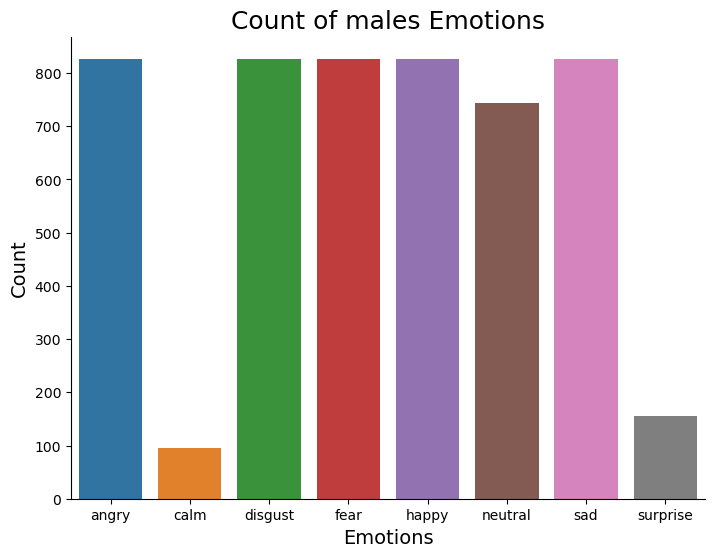

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


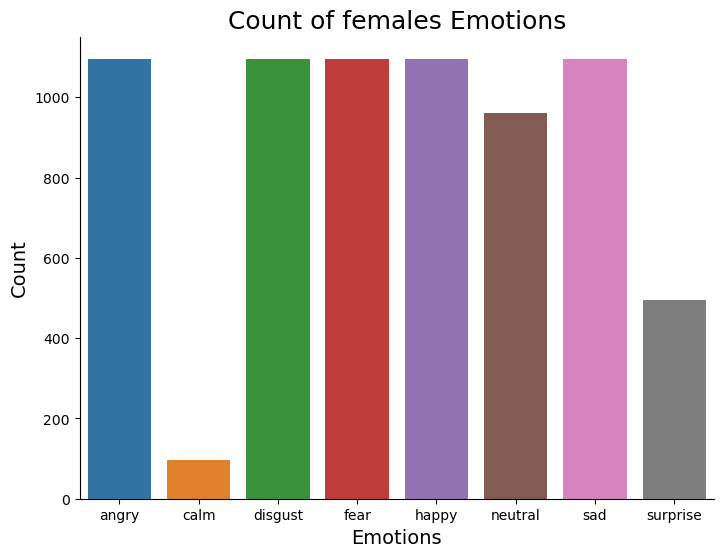

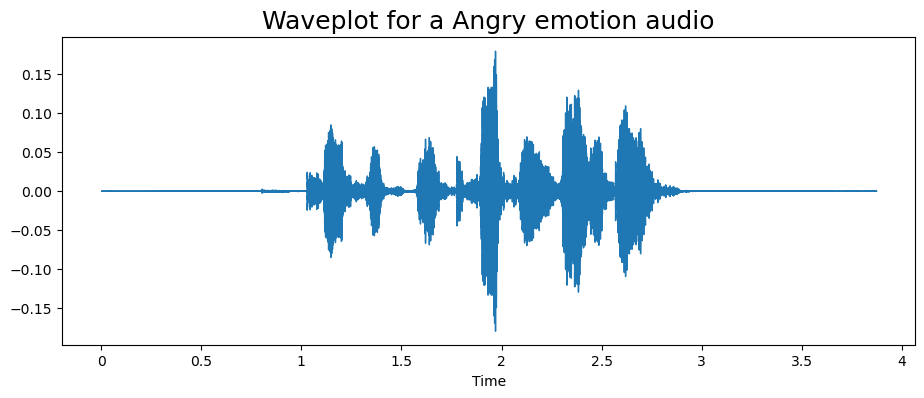

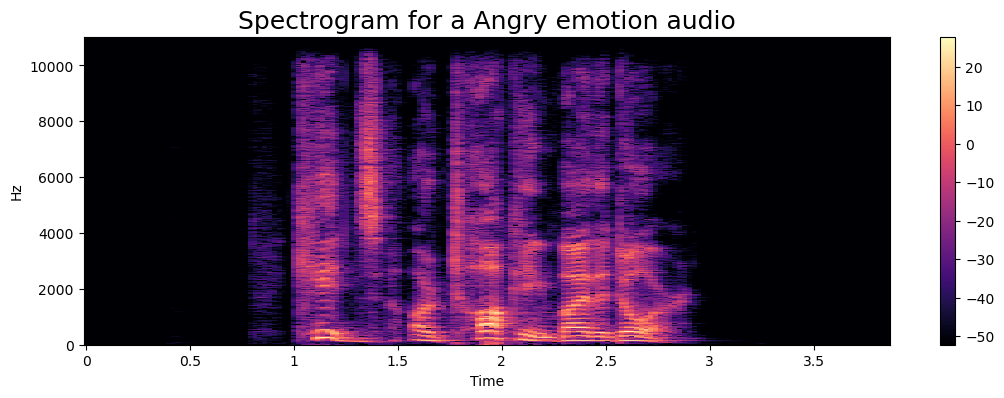

In [3]:
# plotting the emotion count for each gender
import visualizing_data
visualizing_data.plot_emotion_count(Males,'Count of males Emotions')
print('\n\n')
visualizing_data.plot_emotion_count(Females,'Count of females Emotions')
print('\n\n')

# visualizing audio data
# Specify the emotion label
emotion='Angry'
# Specify the path to the audio file
path = "D:\\final_voice_model_3\\RAVDESS\\Actor_01\\03-01-05-01-01-01-01.wav"
# Load the audio data and sampling rate using librosa
data, sampling_rate = librosa.load(path)
# Call the function to plot a waveplot of the audio data
visualizing_data.plot_waveplot(data, sampling_rate, emotion)
# Call the function to plot a spectrogram of the audio data
visualizing_data.plot_spectrogram(data, sampling_rate, emotion)
# Play the audio
Audio(path)                                    

In [4]:
# feature extraction
import extract_features
feature_extracted = False
# checks for if the features are extracted already
if not feature_extracted:
    female_X, female_Y, male_X, male_Y = extract_features.process1(Females,Males)
    Females_Features, Males_Features = extract_features.process2(female_X, female_Y, male_X, male_Y)
else:
    Females_Features = pd.read_csv("D:\\final_voice_model_3\\features\\female_features.csv")
    Males_Features = pd.read_csv("D:\\final_voice_model_3\\features\\male_features.csv")

importing Jupyter notebook from extract_features.ipynb
importing Jupyter notebook from adding_augmentation.ipynb


<string>:4: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
<string>:4: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
<string>:4: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
<string>:9: FutureWarning: Pass rate=0.75 as keyword args. From version 0.10 passing these as positional arguments will result in an error


Female features:  49224  labels:  49224
Male features:  35910  labels:  35910

female dataframe
male dataframe


In [5]:
# prepare data
# Creating an instance of OneHotEncoder to transform the target variable
encoder = OneHotEncoder()
import data_preparation
female_X, female_Y, male_X, male_Y = data_preparation.prepare_data(female_X, female_Y, male_X, male_Y,Females_Features, Males_Features,encoder)

# split data
x_train, x_test, y_train, y_test = data_preparation.split_data(female_X, female_Y, male_X, male_Y)

importing Jupyter notebook from data_preparation.ipynb
shape of the training sets: x_train:  (68107, 58)  y_train:  (68107, 8) 
shape of the testing sets: x_test:  (17027, 58)  y_test:  (17027, 8)


In [6]:
# arrange the data compatible to the model
x_train, x_test, y_train, y_test = data_preparation.arrange_data(x_train, x_test, y_train, y_test)

shape of the training sets: x_train:  (68107, 58, 1)  y_train:  (68107, 8) 
shape of the testing sets: x_test:  (17027, 58, 1)  y_test:  (17027, 8)


In [7]:
# model creation 
import model_creation
total_model = model_creation.build_summary_of_model(x_train.shape[1], x_train, x_test, y_test)

importing Jupyter notebook from model_creation.ipynb
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 58, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (AverageP  (None, 29, 256)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_

In [8]:
# model training
# Define a learning rate reduction callback
learning_rate_reduction_callback = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

cnn_history = total_model.fit(x_train, y_train, batch_size=32, epochs=75, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction_callback])

Epoch 1/75
2129/2129 [==============================] - 47s 22ms/step - loss: 1.3784 - accuracy: 0.4512 - val_loss: 1.1457 - val_accuracy: 0.5427 - lr: 0.0010
Epoch 2/75
2129/2129 [==============================] - 50s 24ms/step - loss: 1.1685 - accuracy: 0.5343 - val_loss: 1.0477 - val_accuracy: 0.5844 - lr: 0.0010
Epoch 3/75
2129/2129 [==============================] - 51s 24ms/step - loss: 1.0938 - accuracy: 0.5673 - val_loss: 1.0112 - val_accuracy: 0.6001 - lr: 0.0010
Epoch 4/75
2129/2129 [==============================] - 51s 24ms/step - loss: 1.0421 - accuracy: 0.5877 - val_loss: 0.9596 - val_accuracy: 0.6181 - lr: 0.0010
Epoch 5/75
2129/2129 [==============================] - 53s 25ms/step - loss: 0.9956 - accuracy: 0.6079 - val_loss: 0.9294 - val_accuracy: 0.6392 - lr: 0.0010
Epoch 6/75
2129/2129 [==============================] - 53s 25ms/step - loss: 0.9521 - accuracy: 0.6276 - val_loss: 0.8824 - val_accuracy: 0.6517 - lr: 0.0010
Epoch 7/75
2129/2129 [========================

In [9]:
# Saving the model
import saving_model
saving_model.save_model(total_model)

importing Jupyter notebook from saving_model.ipynb
Saved trained model at D:\final_voice_model_3\trained_models\model.h5 


# Evaluation

In [10]:
# evaluation
import evaluation
# Evaluate the model on the training data and on the test data
evaluation.evaluate_on_train_and_test(total_model,x_train,y_train,x_test, y_test)

importing Jupyter notebook from evaluation.ipynb
Emotions training Accuracy: 96.64%
emotions testing Accuracy: 87.10%


In [11]:
y_test_all,y_predict_all,predict_all_test = evaluation.predict_on_test_data(total_model,x_test,y_test,encoder)

# Create a pandas DataFrame to store the predicted and actual labels
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predict_all.flatten()
df['Actual Labels'] = y_test_all.flatten()

# Show the first 20 rows of the DataFrame
df.head(20)

533/533 [==============================] - 3s 6ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,surprise,surprise
2,fear,fear
3,fear,fear
4,neutral,disgust
5,angry,angry
6,happy,happy
7,happy,neutral
8,fear,fear
9,neutral,neutral


In [12]:
# Generate a classification report for the test data
print(classification_report(y_test_all, y_predict_all))

              precision    recall  f1-score   support

       angry       0.91      0.92      0.92      2707
        calm       0.89      0.96      0.92       273
     disgust       0.84      0.85      0.85      2745
        fear       0.87      0.84      0.85      2642
       happy       0.86      0.84      0.85      2686
     neutral       0.85      0.86      0.86      2428
         sad       0.85      0.87      0.86      2684
    surprise       0.97      0.95      0.96       862

    accuracy                           0.87     17027
   macro avg       0.88      0.89      0.88     17027
weighted avg       0.87      0.87      0.87     17027



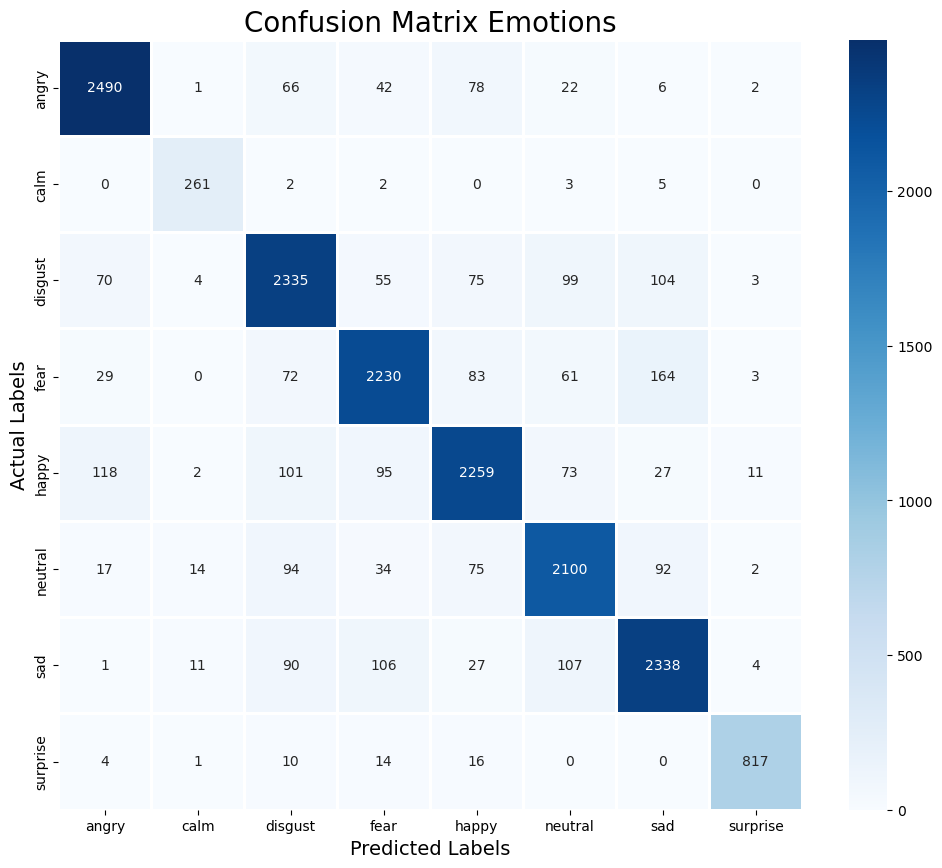

In [13]:
# confusion matrix
evaluation.plot_confusion_matrix(y_test_all, y_predict_all,encoder)

<string>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.


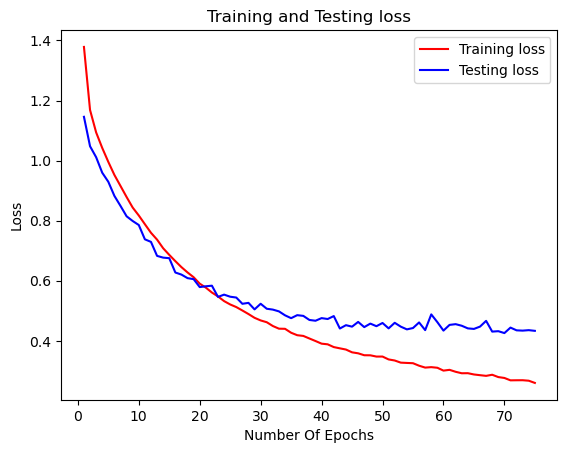

<string>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.


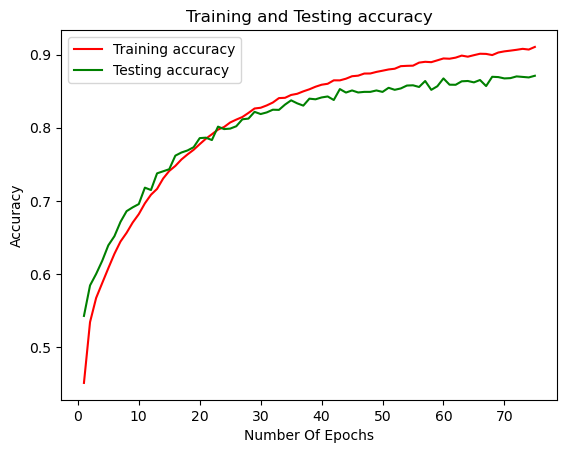

In [14]:
# Loss and Accuracy plots
epochs = evaluation.plot_loss_graph(cnn_history)
print('\n\n')
evaluation.plot_accuracy_graph(cnn_history,epochs)